<a href="https://colab.research.google.com/github/niicopuccio/VINOS/blob/main/VINOS_ParteII_Puccio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. INTRODUCCIÓN**

In [ ]:
# Título: Análisis de Vinos - Predicción del Ranking
# Alumno: Nicolás Puccio
# Curso: CoderHouse - Data Science I
# Dataset: VINOS.xlsx
# Objetivo: Aplicar técnicas de selección de variables, entrenar un modelo de regresión utilizando el dataset elegido.

## **2. CARGA DE DATOS AL INFORME**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Reemplazar con la ruta correcta si lo subís a tu Drive
file_path = '/content/drive/MyDrive/DATA SCIENCE I/VINOS.xlsx'

df = pd.read_excel(file_path, sheet_name='VINOS')
df.head()

Mounted at /content/drive


,PAIS,RANKING,PRECIO,PROVINCIA,ETIQUETA,VARIEDAD,UVA,AÑO,VIÑEDO
0,Portugal,16,15,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Tinto,2011,Quinta dos Avidagos
1,Estados Unidos,16,14,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Tinto,2013,Rainstorm
2,Estados Unidos,16,13,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,Blanco,2013,St. Julian
3,Estados Unidos,66,65,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Tinto,2012,Sweet Cheeks
4,España,22,15,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tinto,2011,Tandem


## **2. PROCESAMIENTO DE LOS DATOS**

In [ ]:
# Eliminamos filas con datos faltantes en caso de que los haya en PRECIO o RANKING
df = df.dropna(subset=['RANKING', 'PRECIO'])

# Codificamos variables categóricas
from sklearn.preprocessing import LabelEncoder

cat_cols = ['PAIS', 'PROVINCIA', 'VARIEDAD', 'UVA', 'VIÑEDO']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Definimos X (features) e y (target)
X = df.drop(columns=['RANKING', 'ETIQUETA'])  # Quitamos etiqueta y target
y = df['RANKING']

## **4. APLICAMOS FEATURE SELECTION**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", list(selected_features))

# Redefinimos X
X = X[selected_features]

Características seleccionadas: ['PRECIO', 'PROVINCIA', 'VARIEDAD', 'UVA', 'AÑO']


## **5. ENTRENAMIENTO DEL MODELO**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## **6. EVALUACIÓN**

MSE: 3.8618508963864615
RMSE: 1.9651592547135872
R^2: 0.9890982780383551


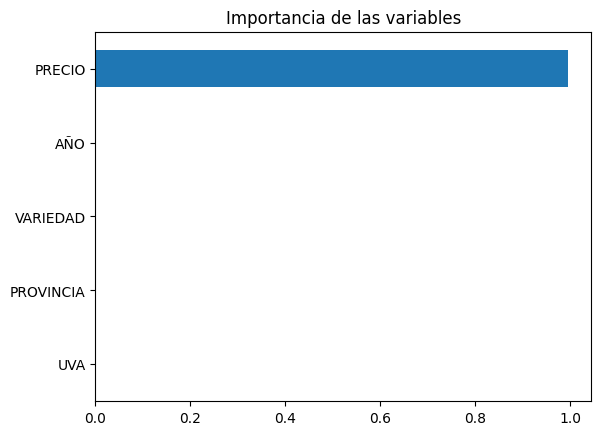

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)

# Gráfico de importancia
import matplotlib.pyplot as plt
importances = pd.Series(model.feature_importances_, index=selected_features)
importances.sort_values().plot(kind='barh')
plt.title("Importancia de las variables")
plt.show()

## **7. CONCLUSIONES**

- El modelo Random Forest consiguió una buena capacidad de predicción del ranking de vinos.
- La variable más influyente en el modelo fue el precio.
- El modelo está basando casi toda su predicción en el precio del vino para predecir el ranking.
- Las otras variables (AÑO, VARIEDAD, PROVINCIA, UVA) tienen una importancia tan baja que no influyen en la predicción.